### Import libs

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

### Import dataset

In [59]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

### Autoencoder

In [60]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)

    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [61]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [62]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 49)             │        38,465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        39,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,665 (303.38 KB)

 Trainable params: 77,665 (303.38 KB)

 Non-trainable params: 0 (0.00 B)

### Preprocessing: from image to ndarray

In [63]:
def preproc(image, side_size = 28):
    #Убедиться, что изображение в нужном цветовом пространстве
    image = image.convert("L")
    #Преобразовать изображение в массив NumPy
    image_array = np.array(image)
    image_array = np.reshape(image_array, (1,side_size,side_size,1))
    return image_array
#дописать нормализацию а то кринж

### Postprocessing: from ndarray to image

In [64]:
def postproc(img_array, side_size = 28):
    image = np.reshape(img_array, (side_size, side_size))
    image = (image * 255).astype(np.uint8)
    image_vis = Image.fromarray(image)
    # image_vis.show()
    return image_vis

### Plot pics by pixels

In [65]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    # args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])

    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

### Fitting autoencoder

In [66]:
autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4448 - val_loss: 0.2151
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2005 - val_loss: 0.1677
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1625 - val_loss: 0.1460
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1433 - val_loss: 0.1316
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1301 - val_loss: 0.1212
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1202 - val_loss: 0.1132
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1128 - val_loss: 0.1068
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1069 - val_loss: 0.1022
Epoch 9/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1018 - val_loss: 0.0975
Epoch 10/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0976 - val_loss: 0.0939
Epoch 11/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0943 - val_loss: 0.0912
Epoch 12/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 

### Encoding and decoding

#### Mnist

In [67]:
#encoding
n = 10
imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


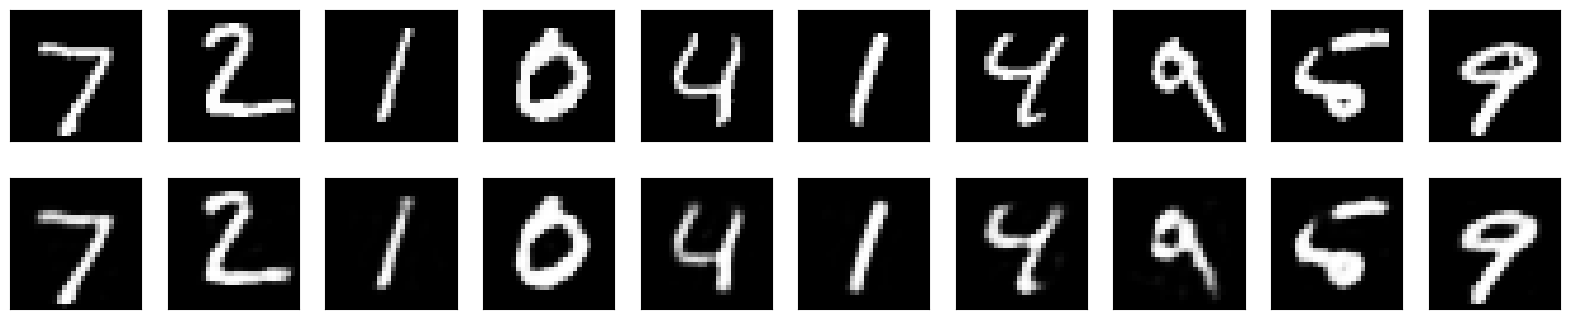

In [68]:
#decoding
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)
plot_digits(imgs, decoded_imgs)

#### My pic

была взята скриншотом картинка из тренировочной выборки, то есть, по сути, другой файл,  
очень похожий на train

In [69]:
image = Image.open("7.jpg")  # Укажите путь к вашему изображению

In [70]:
image_array = preproc(image)

In [71]:
#encoding
encoded_img = encoder.predict(image_array, batch_size = 1)
#decoding
decoded_img = decoder.predict(encoded_img, batch_size = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [72]:
image.show()

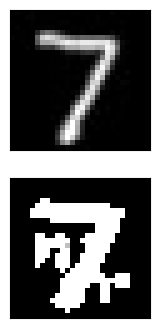

In [73]:
img_vis = postproc(decoded_img)
plot_digits(image_array, decoded_img)

если поставить в autoencoder.fit параметр epochs=5, а batch_size = 256, то конкретно эта картинка будет определена лучше, но кастомная картинка будет определена как все черное

### checking visual loss
Если взять картинку напрямую из тренировочной выборки? 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


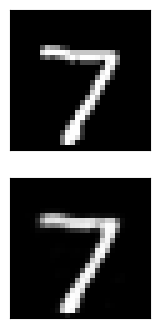

In [74]:
#encoding
n = 1
imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
#decoding
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)
plot_digits(imgs, decoded_imgs)

### Custom pic not as in df

In [75]:
image_custom = Image.open("28-original-bw.jpg")

In [76]:
image_array_custom = preproc(image_custom)

In [77]:
#encoding
encoded_img_custom = encoder.predict(image_array_custom, batch_size = 1)
#decoding
decoded_img_custom = decoder.predict(encoded_img_custom, batch_size = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


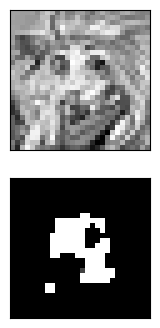

In [78]:
img_vis_custom = postproc(decoded_img_custom)
plot_digits(image_array_custom, decoded_img_custom)

при увеличении batch_size и n_epochs качество улучшилось, но на картинке похожей на тренировочную выборку  - наоборот ухудшилось.